In [10]:

from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

model = LinearRegression().fit(X, y)

print(model.predict([[6]]))


[12.]


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 5, 10, 17, 26])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, y)

print(model.predict(poly.transform([[6]])))


[37.]


In [12]:
from sklearn.linear_model import PoissonRegressor
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 4, 7, 11])

model = PoissonRegressor().fit(X, y)

print(model.predict([[6]]))


[17.54490604]


In [13]:
import numpy as np
import statsmodels.api as sm

X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.params)


[-3.10862447e-15  2.00000000e+00]


In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression

X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([1, 1, 2, 2, 3, 3])

model = LogisticRegression(multi_class='ovr').fit(X, y)

print(model.predict([[4.5]]))


[3]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [17]:
from sklearn.svm import SVR
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

model = SVR(kernel='rbf').fit(X, y)

print(model.predict([[6]]))


[4.60652693]


In [18]:
import numpy as np

X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])


m, b = 0, 0
lr = 0.01
epochs = 1000

for _ in range(epochs):
    y_pred = m * X + b
    m -= lr * (-2/len(X)) * np.sum(X * (y - y_pred))
    b -= lr * (-2/len(X)) * np.sum(y - y_pred)

print(f"m = {m:.2f}, b = {b:.2f}")
print(f"X=6 uchun bashorat: {m*6 + b:.2f}")


m = 2.00, b = 0.02
X=6 uchun bashorat: 11.99


In [19]:
import statsmodels.api as sm
import pandas as pd

df = pd.DataFrame({
    'y': [10, 12, 13, 15, 16, 18],
    'x1': [1, 2, 3, 4, 5, 6],
    'x2': [2, 1, 3, 2, 5, 4],
    'x3': [5, 3, 6, 2, 1, 4]
})

def stepwise_selection(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    while remaining:
        scores = []
        for candidate in remaining:
            X = sm.add_constant(data[selected + [candidate]])
            y = data[response]
            model = sm.OLS(y, X).fit()
            scores.append((model.aic, candidate))
        scores.sort()
        best_new_score, best_candidate = scores[0]
        selected.append(best_candidate)
        remaining.remove(best_candidate)
        print(f"Qo‘shildi: {best_candidate}, AIC = {best_new_score:.2f}")
    return selected

print("Tanlangan o‘zgaruvchilar:", stepwise_selection(df, 'y'))


Qo‘shildi: x1, AIC = 3.85
Qo‘shildi: x2, AIC = -9.81
Qo‘shildi: x3, AIC = -8.28
Tanlangan o‘zgaruvchilar: ['x1', 'x2', 'x3']


In [20]:
from sklearn.linear_model import Lasso
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

model = Lasso(alpha=0.1).fit(X, y)

print("Koef:", model.coef_)
print("Intercept:", model.intercept_)
print("X=6 uchun bashorat:", model.predict([[6]]))


Koef: [1.95]
Intercept: 0.15000000000000036
X=6 uchun bashorat: [11.85]


In [21]:
from sklearn.linear_model import Ridge
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

model = Ridge(alpha=1.0).fit(X, y)

print("Koef:", model.coef_)
print("Intercept:", model.intercept_)
print("X=6 uchun bashorat:", model.predict([[6]]))


Koef: [1.81818182]
Intercept: 0.545454545454545
X=6 uchun bashorat: [11.45454545]


In [22]:
from sklearn.linear_model import ElasticNet
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

model = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X, y)

print("Koef:", model.coef_)
print("Intercept:", model.intercept_)
print("X=6 uchun bashorat:", model.predict([[6]]))


Koef: [1.92682927]
Intercept: 0.21951219512195141
X=6 uchun bashorat: [11.7804878]


In [23]:
from sklearn.linear_model import BayesianRidge
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

model = BayesianRidge().fit(X, y)

print("Koef:", model.coef_)
print("Intercept:", model.intercept_)
print("X=6 uchun bashorat:", model.predict([[6]]))


Koef: [1.99999997]
Intercept: 7.500007548344456e-08
X=6 uchun bashorat: [11.99999992]


In [24]:
from sklearn.linear_model import Lars
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

model = Lars().fit(X, y)

print("Koef:", model.coef_)
print("Intercept:", model.intercept_)
print("X=6 uchun bashorat:", model.predict([[6]]))


Koef: [2.]
Intercept: 0.0
X=6 uchun bashorat: [12.]


In [25]:
from sklearn.neural_network import MLPRegressor
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=2000, random_state=0).fit(X, y)

print("X=6 uchun bashorat:", model.predict([[6]]))


X=6 uchun bashorat: [11.60637018]


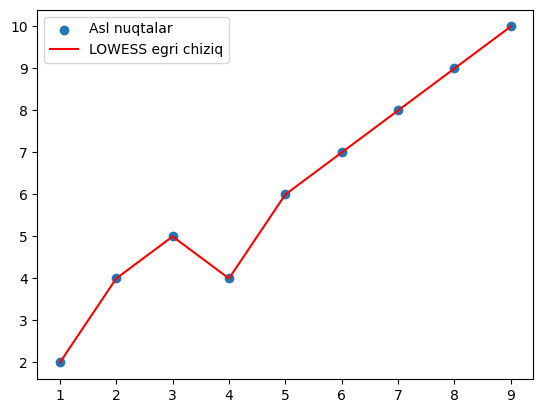

In [26]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 4, 5, 4, 6, 7, 8, 9, 10])

lowess = sm.nonparametric.lowess
y_pred = lowess(y, x, frac=0.4)

plt.scatter(x, y, label="Asl nuqtalar")
plt.plot(y_pred[:, 0], y_pred[:, 1], color='red', label="LOWESS egri chiziq")
plt.legend()
plt.show()


In [28]:

import numpy as np
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression

X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([2, 4, 6, 8, 10, 12])


spline = SplineTransformer(n_knots=4, degree=1, include_bias=False)
X_s = spline.fit_transform(X)

model = LinearRegression().fit(X_s, y)


x_new = np.array([[7]])
print("Spline model predict:", model.predict(spline.transform(x_new)))


Spline model predict: [12.]


In [29]:
import numpy as np

X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

tau = 1.0

def predict(x0):
    weights = np.exp(- (X - x0)**2 / (2 * tau**2))
    W = np.diag(weights)
    X_mat = np.vstack([np.ones(len(X)), X]).T
    theta = np.linalg.inv(X_mat.T @ W @ X_mat) @ X_mat.T @ W @ y
    return np.dot([1, x0], theta)

print("X=6 uchun bashorat:", predict(6))


X=6 uchun bashorat: 11.999999999999883


In [30]:

import numpy as np
import statsmodels.api as sm


np.random.seed(0)
x = np.random.rand(100)
y = 2*x + np.random.randn(100)

X = sm.add_constant(x)
model = sm.QuantReg(y, X)

res = model.fit(q=0.5)
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.09320
Model:                       QuantReg   Bandwidth:                       1.259
Method:                 Least Squares   Sparsity:                        3.200
Date:                Mon, 27 Oct 2025   No. Observations:                  100
Time:                        16:31:54   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3775      0.307      1.229      0.222      -0.232       0.987
x1             1.7020      0.555      3.067      0.003       0.601       2.803


In [31]:

import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(0)
X = np.random.rand(100, 5)
y = 3*X[:,0] + 2*X[:,1] + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LinearRegression().fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
print("R²:", r2_score(y_test, y_pred))


R²: -0.04748857929767536


In [32]:

import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(0)
X = np.random.rand(100, 5)
y = 3*X[:,0] + 2*X[:,1] + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)

y_pred = pls.predict(X_test)
print("R²:", r2_score(y_test, y_pred))


R²: 0.1685909898919249
